## DRILL: Prepare the Data

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.


In [1]:
# Set up environment.
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Upload and show dataset.
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv', skiprows=3, header=1)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [3]:
# Change long column names.
df.rename(columns={"Murder and\nnonnegligent\nmanslaughter":"Murder"})

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000


In [4]:
# View column names, size, types, and tendencies.
print(df.columns)
print(df.shape)
print(df.dtypes)
df.describe()

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')
(351, 13)
City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object


,Murder and nonnegligent manslaughter,Rape (revised definition)1,Arson3
count,348.000,0.000,187.000
mean,1.566,nan,1.872
std,18.304,nan,10.693
min,0.000,nan,0.000
25%,0.000,nan,0.000
50%,0.000,nan,0.000
75%,0.000,nan,1.000
max,335.000,nan,132.000


In [5]:
# Show null column counts.
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Population                                  3
Violent\ncrime                              3
Murder and\nnonnegligent\nmanslaughter      3
Rape\n(revised\ndefinition)1              351
Rape\n(legacy\ndefinition)2                 3
Robbery                                     3
Aggravated\nassault                         3
Property\ncrime                             3
Burglary                                    3
Larceny-\ntheft                             3
Motor\nvehicle\ntheft                       3
Arson3                                    164
dtype: int64

In [6]:
# Eliminate commas from numbers > 999.
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
        
    return converted

In [7]:
# Change NaN values to 0. Convert object types to floats.
df.dropna()
df['Population'] = df['Population'].apply(lambda x: convert_number(x))
df['Population^2'] = df['Population']**2
df['Murder'] = df['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: convert_number(x))
df['Robbery'] = df['Robbery'].apply(lambda x: convert_number(x))
df['Property_Crime'] = df['Property\ncrime'].apply(lambda x: convert_number(x))

In [8]:
# Create new data frame with only relevant columns.
df_fbi = df[['City', 'Population', 'Population^2', 'Murder', 'Robbery', 'Property_Crime']]

In [9]:
# Preview new data frame.
df_fbi.head()

,City,Population,Population^2,Murder,Robbery,Property_Crime
0,Adams Village,1861.000,3463321.000,0.000,0.000,12.000
1,Addison Town and Village,2577.000,6640929.000,0.000,0.000,24.000
2,Akron Village,2846.000,8099716.000,0.000,0.000,16.000
3,Albany,97956.000,9595377936.000,8.000,227.000,4090.000
4,Albion Village,6388.000,40806544.000,0.000,4.000,223.000


In [10]:
# See central tendency data.
df_fbi.describe()

,Population,Population^2,Murder,Robbery,Property_Crime
count,348.000,348.000,348.000,348.000,348.000
mean,40037.632,203554650960.236,1.566,72.902,792.606
std,450037.368,3778875542708.129,18.304,1031.033,7659.725
min,526.000,276676.000,0.000,0.000,0.000
25%,3003.000,9018117.000,0.000,0.000,40.500
50%,7233.500,52325684.500,0.000,1.000,112.500
75%,18427.500,339753567.000,0.000,5.000,341.000
max,8396126.000,70494931807876.000,335.000,19170.000,141971.000


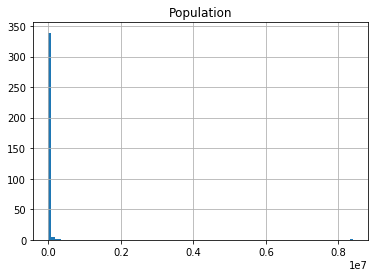

Median  7233.5
Std  450037.3675209857
Outliers above  907308.2350419714


In [11]:
# Check for outliers, central tendencies.
df_fbi['Population'].hist(bins=100)
plt.title('Population')
plt.show()

median = df_fbi.Population.median()
std = df_fbi.Population.std()
pop_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', pop_out)

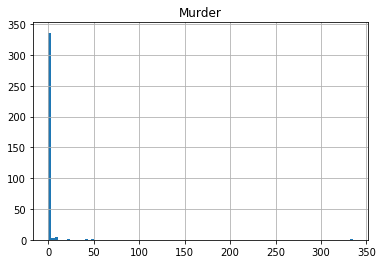

Median  0.0
Std  18.303672792887753
Outliers above  36.607345585775505


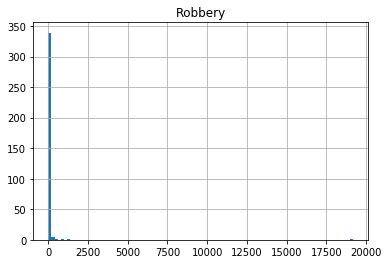

Median  1.0
Std  1031.0328732955247
Outliers above  2063.0657465910494


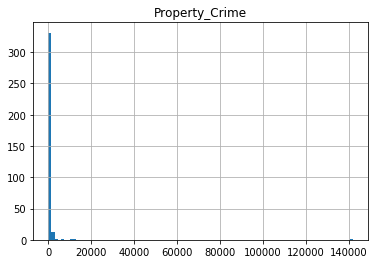

Median  112.5
Std  7659.724745633149
Outliers above  15431.949491266298


In [12]:
# Check for outliers, central tendencies for other variables.
df_fbi['Murder'].hist(bins=100)
plt.title('Murder')
plt.show()

median = df_fbi['Murder'].median()
std = df['Murder'].std()
mur_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', mur_out)

df['Robbery'].hist(bins=100)
plt.title('Robbery')
plt.show()

median = df_fbi['Robbery'].median()
std = df_fbi['Robbery'].std()
rob_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', rob_out)

df['Property_Crime'].hist(bins=100)
plt.title('Property_Crime')
plt.show()

median = df_fbi['Property_Crime'].median()
std = df_fbi['Property_Crime'].std()
prop_crime_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', prop_crime_out)

In [13]:
# Dealing with outliers (create a ceiling value for outliers).
df_fbi['Population'] = df_fbi['Population'].map(lambda x: x if x < pop_out else 900000)
df_fbi['Murder'] = df_fbi['Murder'].map(lambda x: x if x < mur_out else 36)
df_fbi['Robbery'] = df_fbi['Robbery'].map(lambda x: x if x < rob_out else 2000)
df_fbi['Property_Crime'] = df_fbi['Property_Crime'].map(lambda x: x if x < prop_crime_out else 15000)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [14]:
# Create boolean values for 'Murder' and 'Total_Robbery' columns.
def is_zero(number):
    value = convert_number(number)
    
    if value==0:
        return 0
    else:
        return 1
df_fbi['Murder_bool'] = df_fbi['Murder'].apply(lambda x: is_zero(x))
df_fbi['Robbery_bool'] = df_fbi['Robbery'].apply(lambda x: is_zero(x))
df_fbi.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,City,Population,Population^2,Murder,Robbery,Property_Crime,Murder_bool,Robbery_bool
0,Adams Village,1861.000,3463321.000,0.000,0.000,12.000,0,0
1,Addison Town and Village,2577.000,6640929.000,0.000,0.000,24.000,0,0
2,Akron Village,2846.000,8099716.000,0.000,0.000,16.000,0,0
3,Albany,97956.000,9595377936.000,8.000,227.000,4090.000,1,1
4,Albion Village,6388.000,40806544.000,0.000,4.000,223.000,0,1


In [15]:
# Replace 'Robbery' and 'Property_Crime' columns with boolean value columns.
df_fbi2 = df_fbi[['City', 'Population', 'Population^2', 'Property_Crime', 'Murder_bool', 'Robbery_bool']]
df_fbi2.head()

,City,Population,Population^2,Property_Crime,Murder_bool,Robbery_bool
0,Adams Village,1861.000,3463321.000,12.000,0,0
1,Addison Town and Village,2577.000,6640929.000,24.000,0,0
2,Akron Village,2846.000,8099716.000,16.000,0,0
3,Albany,97956.000,9595377936.000,4090.000,1,1
4,Albion Village,6388.000,40806544.000,223.000,0,1


In [16]:
# Check null column counts again.
null_columns=df_fbi2.columns[df_fbi2.isnull().any()]
df_fbi2[null_columns].isnull().sum()

Population^2    3
dtype: int64

In [17]:
df_fbi.loc[216]

City                       New York
Population               900000.000
Population^2     70494931807876.000
Murder                       36.000
Robbery                    2000.000
Property_Crime            15000.000
Murder_bool                       1
Robbery_bool                      1
Name: 216, dtype: object

In [18]:
# Fill na values with zero.
df_fbi2.fillna(0)
# Show null column counts.
null_columns=df_fbi2.columns[df_fbi2.isnull().any()]
df_fbi2[null_columns].isnull().sum()

Population^2    3
dtype: int64

In [19]:
# View last columns to find missing na values.
df_fbi2.tail()

,City,Population,Population^2,Property_Crime,Murder_bool,Robbery_bool
346,Yonkers,199134.000,39654349956.000,2368.000,1,1
347,Yorktown Town,36643.000,1342709449.000,334.000,0,1
348,1 The figures shown in this column for the off...,900000.000,nan,15000.000,1,1
349,2 The figures shown in this column for the off...,900000.000,nan,15000.000,1,1
350,3 The FBI does not publish arson data unless i...,900000.000,nan,15000.000,1,1


In [20]:
# Eliminate the last three lines of the dataframe.
df_fbi3 = df_fbi2[:348]
df_fbi3.tail()

,City,Population,Population^2,Property_Crime,Murder_bool,Robbery_bool
343,Woodbury Town,10685.000,114169225.000,541.000,0,1
344,Woodridge Village,829.000,687241.000,17.000,0,0
345,Woodstock Town,5931.000,35176761.000,58.000,0,0
346,Yonkers,199134.000,39654349956.000,2368.000,1,1
347,Yorktown Town,36643.000,1342709449.000,334.000,0,1


In [21]:
# Find max population value and drop it.
df_fbi.groupby(['City','Population'])['Population'].max

<bound method GroupBy.max of <pandas.core.groupby.groupby.SeriesGroupBy object at 0x11dd8cbe0>>

In [22]:
# Double check value at row 216.
df_fbi.loc[216]

City                       New York
Population               900000.000
Population^2     70494931807876.000
Murder                       36.000
Robbery                    2000.000
Property_Crime            15000.000
Murder_bool                       1
Robbery_bool                      1
Name: 216, dtype: object

In [23]:
# Check for remaining null values.
null_columns=df_fbi3.columns[df_fbi3.isnull().any()]
df_fbi3[null_columns].isnull().sum()

Series([], dtype: float64)

In [24]:
# Check data types again.
print(df_fbi3.dtypes)

City               object
Population        float64
Population^2      float64
Property_Crime    float64
Murder_bool         int64
Robbery_bool        int64
dtype: object


In [25]:
# Find where Population is null as 0.
df_fbi3[df_fbi3['Population']==0]

,City,Population,Population^2,Property_Crime,Murder_bool,Robbery_bool


In [26]:
# Find where Population values are 0.
df_fbi3[df_fbi3['Population'].isnull()].index.tolist()

[]

In [27]:
# Check values for NYC.
df_fbi3[df_fbi3['City']=='New York']

,City,Population,Population^2,Property_Crime,Murder_bool,Robbery_bool
216,New York,900000.000,70494931807876.000,15000.000,1,1


In [28]:
# Run regression.
regr = linear_model.LinearRegression()
Y = df_fbi3['Property_Crime'].values.reshape(-1, 1)
X = df_fbi3[['Population', 'Population^2', 'Murder_bool', 'Robbery_bool']]
regr.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('R-squared: \n', regr.score(X, Y))

Coefficients: 
 [[ 3.44157767e-02 -2.23888124e-10  1.43562879e+01 -9.44786464e+01]]
Intercept: 
 [-108.54935591]
R-squared: 
 0.8658812863422005


In [39]:
# Test the model with different holdout groups.
from sklearn.model_selection import train_test_split
# Create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_train, y_train)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))

With 20% Holdout: 0.8472102359190959
Testing on Sample: 0.8658812863422005


In [41]:
# Check my model using cross validation.
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=10)

array([ 7.60446395e-01,  8.26604190e-01,  1.27024059e-03,  5.10759159e-01,
        4.79569542e-01,  4.26480578e-01, -3.05389647e+05,  8.24306289e-01,
        8.87043776e-01, -1.00389931e+00])

These values all seem to be significantly small values, with the exception of the -3.05389647e+05,
which is a much lesser value than the others.  It doesn't seem right to me, but it may be that a 
number with a negative value is insignificant.